## import & load

In [70]:
import pandas as pd
import numpy as np
import sys
import requests
import pprint

from collections import defaultdict
import datetime
import pytz
import importlib
import matplotlib.pyplot as plt

import datetime, json, math
from google.cloud import bigquery
from numpy_ext import rolling_apply as rolling_apply_ext

In [2]:
import os

if os.path.exists('credential.json'):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.join(os.getcwd(), 'credential.json')

In [40]:
import data.read
importlib.reload(data.read)

<module 'data.read' from '/home/junlim/projects/jitter_recovery/data/read.py'>

In [447]:
df = data.read.df_okx_20240103_0104.dropna()
#df = data.read.df_okx_20240101_0131.dropna()
#df = data.read.df_okx_20240203_0205.dropna()
df_close = df.pivot(index='timestamp', columns='symbol', values='close')
dfi = df.set_index(['timestamp', 'symbol'])
all_symbols = df.symbol.unique()

In [448]:
df.tail(3)

,timestamp,symbol,open,high,low,close,volume
261217,2024-01-04 04:58:00,GAS-USDT-SWAP,6.201,6.201,6.192,6.192,266.000
261218,2024-01-04 04:58:00,RNDR-USDT-SWAP,4.481,4.481,4.479,4.479,61.000
261219,2024-01-04 04:58:00,YFI-USDT-SWAP,7612.000,7612.000,7607.000,7607.000,0.056


In [449]:
all_symbols = [s for s in all_symbols if s]

In [450]:
len([s for s in all_symbols if 'USDT' in s])

153

## multiple symbols

In [607]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.jitter_recovery.calculate_collective
importlib.reload(algo.jitter_recovery.calculate_collective)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.jitter_recovery.research_collective
importlib.reload(algo.jitter_recovery.research_collective)

<module 'algo.jitter_recovery.research_collective' from '/home/junlim/projects/jitter_recovery/algo/jitter_recovery/research_collective.py'>

In [608]:
feature_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryFeatureParam(40)
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.15, +0.04, -0.02)

In [609]:
dfst_feature, dfst_trading = algo.jitter_recovery.research_collective.get_dfsts(df, trading_param)

0 symbol: STX-USDT-SWAP: 34 (feature)
1 symbol: LUNC-USDT-SWAP: 40 (feature)
2 symbol: MINA-USDT-SWAP: 39 (feature)
3 symbol: EGLD-USDT-SWAP: 39 (feature)
4 symbol: SNX-USDT-SWAP: 38 (feature)
5 symbol: GMT-USDT-SWAP: 38 (feature)
6 symbol: OP-USDT-SWAP: 39 (feature)
7 symbol: JST-USDT-SWAP: 0 (feature)
8 symbol: DYDX-USDT-SWAP: 40 (feature)
9 symbol: BNB-USDT-SWAP: 0 (feature)
10 symbol: MAGIC-USDT-SWAP: 39 (feature)
11 symbol: OMG-USDT-SWAP: 39 (feature)
12 symbol: FITFI-USDT-SWAP: 39 (feature)
13 symbol: PERP-USDT-SWAP: 40 (feature)
14 symbol: FRONT-USDT-SWAP: 29 (feature)
15 symbol: MANA-USDT-SWAP: 38 (feature)
16 symbol: EOS-USDT-SWAP: 34 (feature)
17 symbol: ANT-USDT-SWAP: 0 (feature)
18 symbol: LRC-USDT-SWAP: 40 (feature)
19 symbol: 1INCH-USDT-SWAP: 38 (feature)
20 symbol: CTC-USDT-SWAP: 39 (feature)
21 symbol: TRB-USDT-SWAP: 40 (feature)
22 symbol: TRX-USDT-SWAP: 0 (feature)
23 symbol: GFT-USDT-SWAP: 38 (feature)
24 symbol: SSV-USDT-SWAP: 39 (feature)
25 symbol: MKR-USDT-SWAP: 

In [610]:
df_collective_feature = dfst_feature.dropna().groupby('timestamp')[collective_feature_columns_no_rolling].median().resample('1min').asfreq().ffill()
df_collective_feature['ch_window30_min'] = df_collective_feature.ch.rolling(window=30).min() 

<Axes: xlabel='timestamp'>

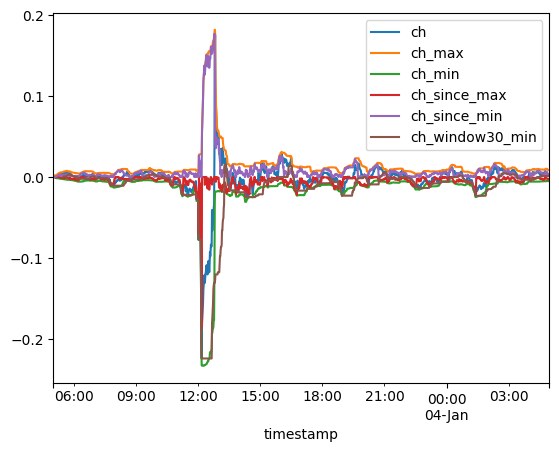

In [611]:
df_collective_feature.plot()

<Axes: xlabel='timestamp'>

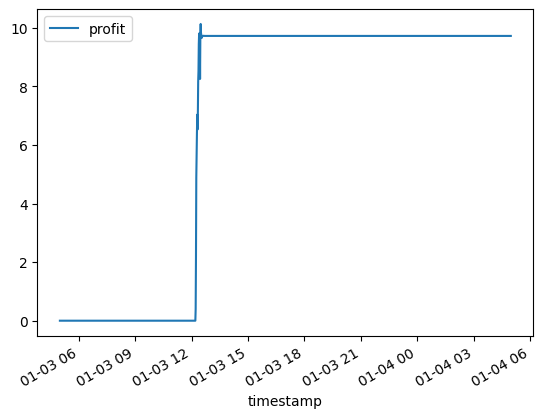

In [612]:
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot()

In [613]:
df_collective_feature[
    df_collective_feature.ch_window30_min < -0.10
]

,ch,ch_max,ch_min,ch_since_max,ch_since_min,ch_window30_min
timestamp,,,,,,
2024-01-03 12:08:00,-0.119581,0.028044,-0.125858,-0.079684,0.000000,-0.119581
2024-01-03 12:09:00,-0.203137,0.028044,-0.205095,-0.161435,0.000000,-0.203137
2024-01-03 12:10:00,-0.224305,0.028802,-0.232525,-0.187094,0.000000,-0.224305
2024-01-03 12:11:00,-0.180880,0.056311,-0.233276,0.000000,0.055313,-0.224305
2024-01-03 12:12:00,-0.174228,0.072126,-0.233276,0.000000,0.071046,-0.224305
2024-01-03 12:13:00,-0.165350,0.083799,-0.233276,0.000000,0.083799,-0.224305
2024-01-03 12:14:00,-0.155505,0.097288,-0.233276,0.000000,0.097288,-0.224305
2024-01-03 12:15:00,-0.138899,0.118269,-0.233276,0.000000,0.118269,-0.224305
2024-01-03 12:16:00,-0.133927,0.125017,-0.233276,0.000000,0.124684,-0.224305


<Axes: xlabel='timestamp'>

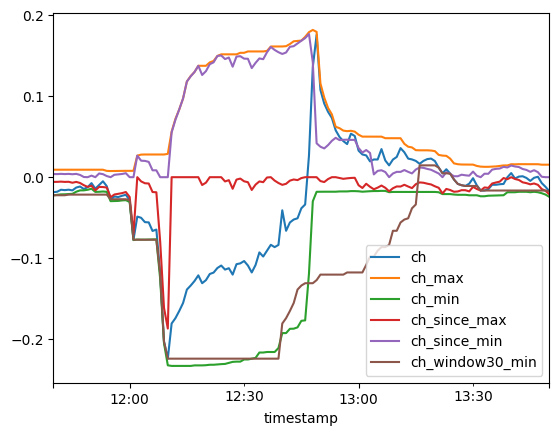

In [614]:
df_collective_feature[
    (df_collective_feature.index >= "2024-01-03 11:40:00")
    & (df_collective_feature.index <= "2024-01-03 13:50:00")
].plot()

In [615]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    if 'PERP' not in row['symbol']: continue
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 12:13:00, PERP-USDT-SWAP, 1.6581, position_changed: 1.0
2024-01-03 12:16:00, PERP-USDT-SWAP, 1.8838, position_changed: -1.0
2024-01-03 12:17:00, PERP-USDT-SWAP, 1.8575, position_changed: 1.0
2024-01-03 12:18:00, PERP-USDT-SWAP, 1.8033, position_changed: -1.0
2024-01-03 12:19:00, PERP-USDT-SWAP, 1.6796, position_changed: 1.0
2024-01-03 12:23:00, PERP-USDT-SWAP, 1.81, position_changed: -1.0
2024-01-03 12:24:00, PERP-USDT-SWAP, 1.8786, position_changed: 1.0
2024-01-03 12:25:00, PERP-USDT-SWAP, 1.801, position_changed: -1.0
2024-01-03 12:26:00, PERP-USDT-SWAP, 1.8229, position_changed: 1.0
2024-01-03 12:27:00, PERP-USDT-SWAP, 1.7579, position_changed: -1.0
2024-01-03 12:28:00, PERP-USDT-SWAP, 1.81, position_changed: 1.0
2024-01-03 12:29:00, PERP-USDT-SWAP, 1.8183, position_changed: -1.0


In [616]:
dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().sort_values('profit')

,profit
symbol,
TURBO-USDT-SWAP,-0.001203
XCH-USDT-SWAP,0.001004
ZIL-USDT-SWAP,0.003332
SLP-USDT-SWAP,0.012882
PEPE-USDT-SWAP,0.019141
...,...
TON-USDT-SWAP,0.147112
METIS-USDT-SWAP,0.152055
BIGTIME-USDT-SWAP,0.168430


array([[<Axes: title={'center': 'profit'}>]], dtype=object)

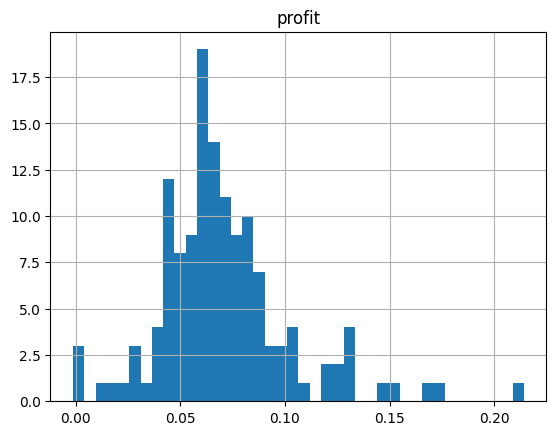

In [617]:
dfst_trading[dfst_trading.profit != 0][['profit']].dropna().groupby('symbol').sum().hist(bins=40)

In [618]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 12:12:00, MATIC-USDT-SWAP, 0.8041, position_changed: 1.0
2024-01-03 12:12:00, NEAR-USDT-SWAP, 3.182, position_changed: 1.0
2024-01-03 12:12:00, GMT-USDT-SWAP, 0.2732, position_changed: 1.0
2024-01-03 12:12:00, LDO-USDT-SWAP, 2.631, position_changed: 1.0
2024-01-03 12:12:00, XLM-USDT-SWAP, 0.1142, position_changed: 1.0
2024-01-03 12:12:00, PEPE-USDT-SWAP, 1.11e-06, position_changed: 1.0
2024-01-03 12:12:00, CELO-USDT-SWAP, 0.698, position_changed: 1.0
2024-01-03 12:12:00, HBAR-USDT-SWAP, 0.08034, position_changed: 1.0
2024-01-03 12:12:00, BIGTIME-USDT-SWAP, 0.3228, position_changed: 1.0
2024-01-03 12:12:00, ACE-USDT-SWAP, 7.74, position_changed: 1.0
2024-01-03 12:12:00, SOL-USDT-SWAP, 90.9, position_changed: 1.0
2024-01-03 12:12:00, PYTH-USDT-SWAP, 0.2263, position_changed: 1.0
2024-01-03 12:12:00, CTC-USDT-SWAP, 0.5743, position_changed: 1.0
2024-01-03 12:12:00, QTUM-USDT-SWAP, 2.958, position_changed: 1.0
2024-01-03 12:12:00, ORDI-USDT-SWAP, 69.455, position_changed: 1.0
20

## single symobl

In [603]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.jitter_recovery.calculate_collective
importlib.reload(algo.jitter_recovery.calculate_collective)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.jitter_recovery.research_collective
importlib.reload(algo.jitter_recovery.research_collective)

<module 'algo.jitter_recovery.research_collective' from '/home/junlim/projects/jitter_recovery/algo/jitter_recovery/research_collective.py'>

In [604]:
symbol_investigate = 'PYTH-USDT-SWAP'
dfs = dfi.xs(symbol_investigate, level=1)

In [605]:
feature_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryFeatureParam(40)
trading_param = algo.jitter_recovery.calculate_collective.CollectiveRecoveryTradingParam(
    feature_param, 
    -0.15, +0.04, -0.02)

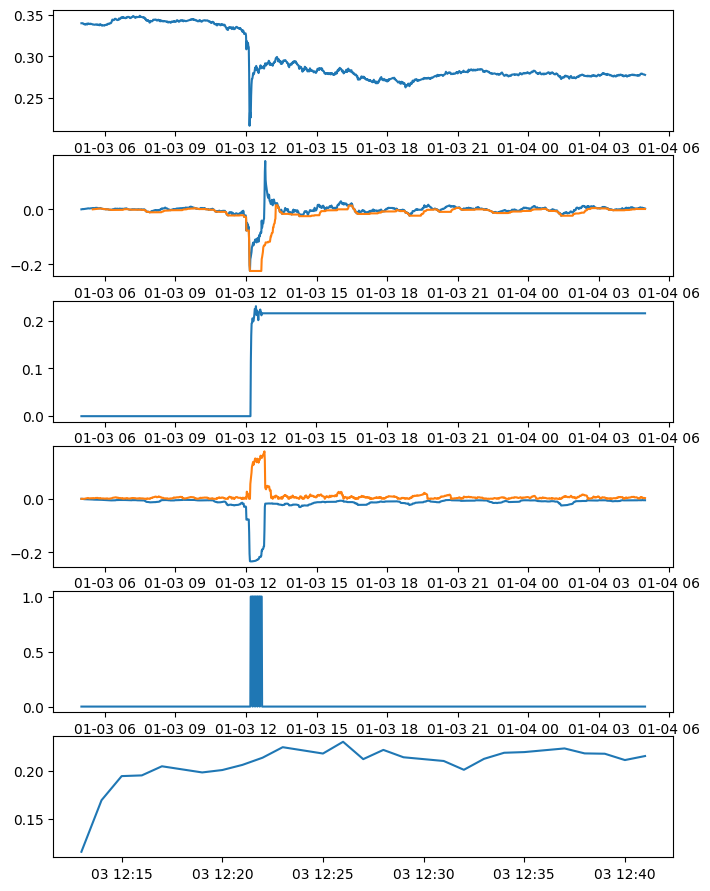

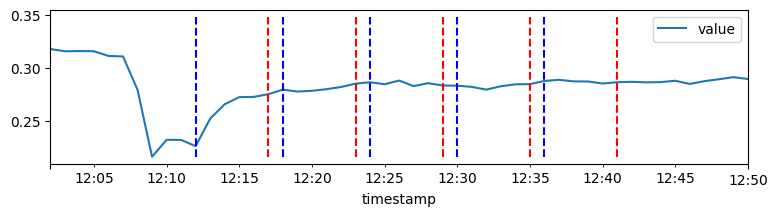

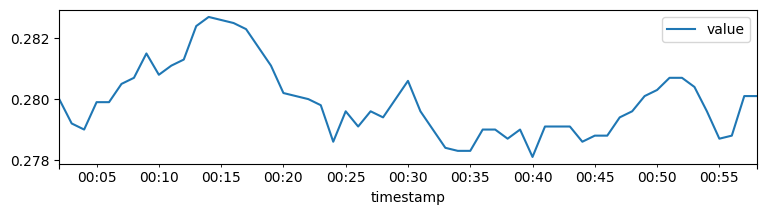

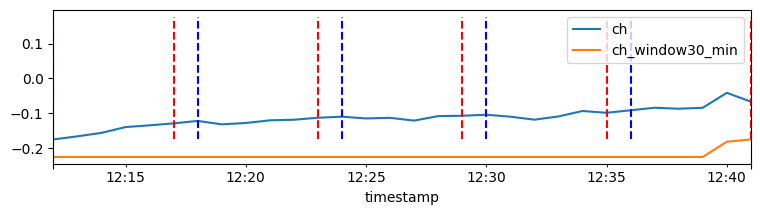

In [606]:
df_feature, df_trading = algo.jitter_recovery.research_collective.investigate_symbol(df, df_collective_feature, symbol_investigate, trading_param, figsize=(8, 11))

In [577]:
df_trading[(df_trading.position_changed != 0)][['value', 'in_position', 'position_changed', 'profit_raw', 'profit']].dropna()

,value,in_position,position_changed,profit_raw,profit
timestamp,,,,,
2024-01-03 12:13:00,0.000265,1,1.0,0.000000,0.000000
2024-01-03 12:16:00,0.000258,0,-1.0,-0.000014,-0.052225
2024-01-03 12:17:00,0.000275,1,1.0,0.000000,0.000000
2024-01-03 12:19:00,0.000269,0,-1.0,-0.000015,-0.053502
2024-01-03 12:20:00,0.000279,1,1.0,0.000000,0.000000
2024-01-03 12:26:00,0.000283,0,-1.0,0.000008,0.029080
2024-01-03 12:27:00,0.000278,1,1.0,-0.000000,-0.000000
2024-01-03 12:32:00,0.000286,0,-1.0,-0.000004,-0.012440


In [578]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    if row['symbol'] != symbol_investigate: continue
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 12:13:00, TURBO-USDT-SWAP, 0.0002649, position_changed: 1.0
2024-01-03 12:16:00, TURBO-USDT-SWAP, 0.0002577, position_changed: -1.0
2024-01-03 12:17:00, TURBO-USDT-SWAP, 0.0002746, position_changed: 1.0
2024-01-03 12:19:00, TURBO-USDT-SWAP, 0.0002689, position_changed: -1.0
2024-01-03 12:20:00, TURBO-USDT-SWAP, 0.0002791, position_changed: 1.0
2024-01-03 12:26:00, TURBO-USDT-SWAP, 0.0002831, position_changed: -1.0
2024-01-03 12:27:00, TURBO-USDT-SWAP, 0.0002781, position_changed: 1.0
2024-01-03 12:32:00, TURBO-USDT-SWAP, 0.0002858, position_changed: -1.0
